# SISTEMA SOLAR


Queremos simular la evolución del Sistema Solar (Sol y Plutón incluidos)

In [1]:
#Simulación de la Tierra mediante la ecuación de Verlet
import numpy as np
import matplotlib.pyplot as plt
import time

#Definimos el paso (h) y el número de pasos (n_pasos)
h = 0.001
n_pasos = 10000
step = 10

#Constantes
mass_sun = 1.99e30
G = 6.67e-11
c = 1.496e11
fact = np.sqrt(G*mass_sun/c**3)
mass_sun = 1.99e30

m_sun = 1
m_mercury = 0.33e24/mass_sun
m_venus = 4.87e24/mass_sun
m_earth = 5.97e24/mass_sun
m_mars = 0.642e24/mass_sun
m_jupiter = 1899e24/mass_sun
m_saturn = 568e24/mass_sun
m_uranus = 86.8e24/mass_sun
m_neptune = 102e24/mass_sun
m_pluto = 0.0125e24/mass_sun



r_sun = 0
r_mercury = 57.9e9
r_venus = 108.2e9
r_earth = 149.6e9
r_mars = 227.9e9
r_jupiter = 778.6e9
r_saturn = 1433.5e9
r_uranus = 2872.5e9
r_neptune = 4495.1e9
r_pluto = 5870.0e9

#Más vectores. Las posiciones en x iniciales son los radios y en y son cero.
#La velocidad inicial es toda en el eje y, mientras que en el eje x es cero.
mass = np.array([m_sun, m_mercury, m_venus, m_earth, m_mars, m_jupiter, m_saturn, m_uranus, m_neptune, m_pluto])

x_pos = 1/c*np.array([r_sun, r_mercury, r_venus, r_earth, r_mars, r_jupiter, r_saturn, r_uranus, r_neptune, r_pluto])
v_y = 1000*np.sqrt(c/(G*mass_sun))*np.array([0, 47.9, 35, 29.8, 24.1, 13.1, 9.7, 6.8, 5.4, 4.7])


#Creamos el array de arrays en el que iremos almacenando toda la información (estado del sistema). Inicialmente sus 
#valores vienen dados por las condiciones iniciales (se usa un array auxiliar para llenar de 0 algunas entradas)
aux = np.zeros(10)
est = np.array([x_pos, aux, aux, v_y, aux, aux, aux, aux])



#Definimos las funciones para w, a, v, x, y
def wx(h, est):
    est[4] = est[2] + est[6]*h/2

def vx(h, est):
    est[2] = est[4] + est[6]*h/2

def ax(h, mj, est):
    for j in range (0, len(x_pos)):
        add = 0.0
        for i in range (0, len(x_pos)):
            if j != i:
                add = add - mj[i]*(est[0][j]-est[0][i])/num(est, i, j)
        est[6][j] = add
    

def x(h, est):
    est[0] = est[0] + h*est[2] + est[6]*(h**2/2)

def wy(h, est):
    est[5] = est[3] + h/2*est[7]

def vy(h, est):
    est[3] = est[5] + est[7]*h/2


def ay(h, mj, est):
    for j in range (0, len(x_pos)):
        add = 0.0
        for i in range (0, len(x_pos)):
            if j != i:
                add = add - mj[i]*(est[1][j]-est[1][i])/num(est, i, j)
        est[7][j] = add


def y(h, est):
    est[1] = est[1] + h*est[3] + est[7]*(h**2/2)
        
def num(est, i, j):
    return ((est[0][i] - est[0][j])**2 + (est[1][i] - est[1][j])**2)**(3/2)


#Comprobación de la conservación de la energía del sistema. La energía de cada planeta vendrá dada por
# E = T + V = 1/2*m*v^2 -GMm/r

#Creamos una función que calcule la energía cinética y potencial de los cuerpos celestes en un instante dado.
#Lo almacenamos en un vector

k_energy = np.zeros((10, int(n_pasos/step) +1))
p_energy = np.zeros((10, int(n_pasos/step) +1))

def kinetic(est, mass, k_energy, index):
    for j in range (0, len(x_pos)):
        k_energy[j][index] = 0.5*mass[j]*((est[2][j])**2 + (est[3][j])**2)
        
def potential(est, mass, p_energy, num, index):
    for j in range (0, len(x_pos)):
        for i in range (0, len(x_pos)):
            if j!= i:
                #Usamos de nuevo la función para el denominador, simplemente que ahora no es al cubo.
                p_energy[j][index] = -G*mass[j]*mass[i]/(num(est, i, j)**(1/3))

print(mass, x_pos, v_y)

[1.00000000e+00 1.65829146e-07 2.44723618e-06 3.00000000e-06
 3.22613065e-07 9.54271357e-04 2.85427136e-04 4.36180905e-05
 5.12562814e-05 6.28140704e-09] [ 0.          0.38703209  0.72326203  1.          1.52339572  5.20454545
  9.58221925 19.20120321 30.04745989 39.23796791] [0.         1.60809557 1.17501764 1.00044359 0.80908357 0.43979232
 0.32564775 0.22828914 0.18128844 0.15778808]


In [7]:
#Calculamos las aceleraciones 

aux = np.zeros(10)
est = np.array([x_pos, aux, aux, v_y, aux, aux, aux, aux])

#Relacionado con la medición del período
last = [[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]
period = [[],[],[],[],[],[],[],[],[],[]]

step = 10
xaxis = np.zeros((10, int(n_pasos/step) +1))
yaxis = np.zeros((10, int(n_pasos/step) +1))

ay(h, mass, est)
ax(h, mass, est)

print(a, b)

#Inicializamos el índice a 0 para usarlo en las funciones de las energías, almacenando así los valores iniciales
index = 0
for j in range (0, len(x_pos)):
    xaxis[j][0] = x_pos[j]
    yaxis[j][0] = aux[j]

kinetic(est, mass, k_energy, index)
potential(est, mass, p_energy, num, index)

start_time = time.time()

index = 1
for i in range (n_pasos):

    y(h, est)
    x(h, est)
    
    wy(h, est)
    wx(h, est)
    
#   Calculamos las nuevas aceleraciones para poder actualizar la velocidad
    
    ay(h, mass, est)
    ax(h, mass, est)
    
    
#   Actualizamos las velocidades

    vy(h, est)
    vx(h, est)
    
    if i%step == 0:
        for k in range (0, len(x_pos)):
            
            xaxis[k][index] = est[0][k]
            yaxis[k][index] = est[1][k]
            
        kinetic(est, mass, k_energy, index)
        potential(est, mass, p_energy, num, index)
            
        index = index + 1
    
    #Para no dividir entre 0, ya que est[1][0] = 0
    if i > 1:
        for j in range (0, len(period)):
            if (est[1][j]/last[j]) < 0 and est[0][j] > 0:
                period[j].append(i)
            
            last[j] = est[1][j]
        
for j in range (0, len(period)):
    period[j].append(0)
    
print(f'Tiempo de ejecución = {time.time() - start_time} sec.')
#print(period)

None None
Tiempo de ejecución = 2.3507542610168457 sec.


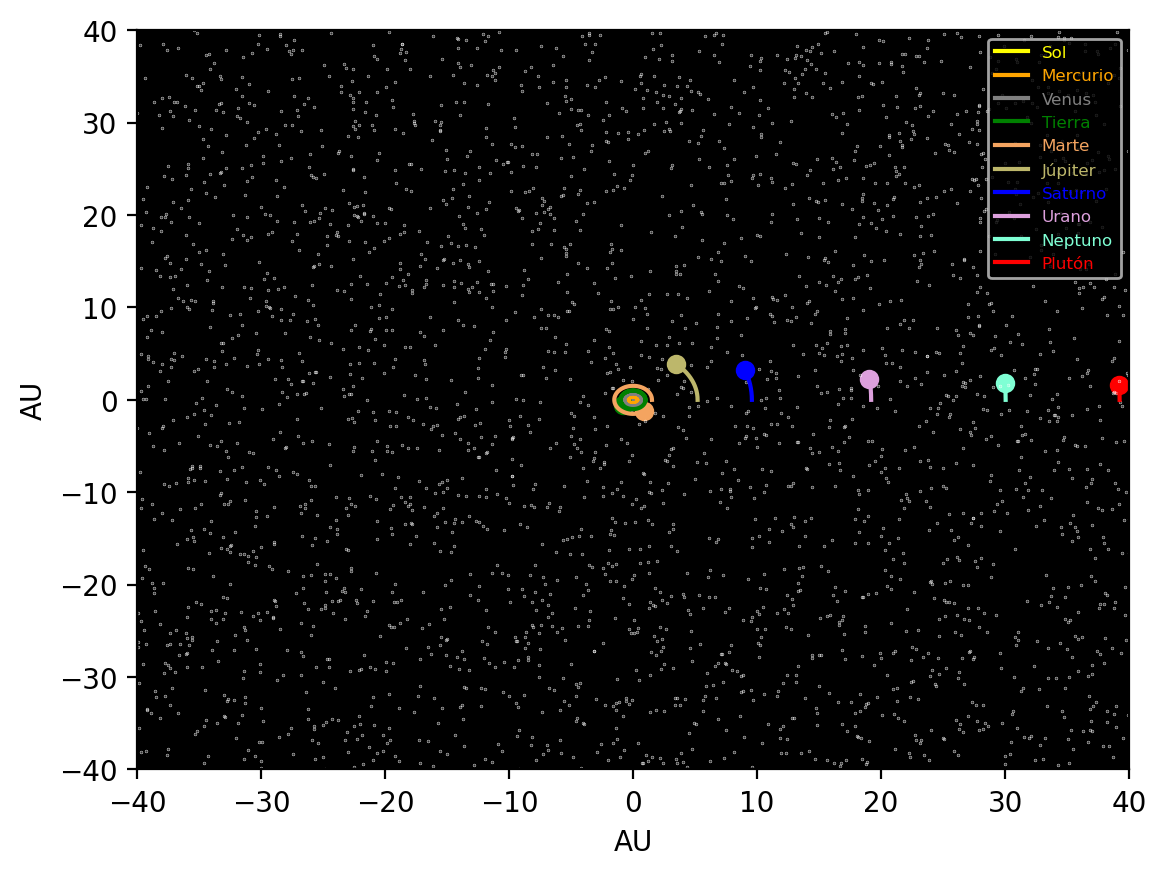

1001


In [8]:
fig = plt.figure(dpi = 200)
plt.rcParams['axes.facecolor'] = 'black'

#Creamos un vector para poner una leyenda en la gráfica y otro para poner el planeta y su traza del mismo color
planet = ['Sol', 'Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno', 'Plutón']
color = ['yellow', 'orange', 'grey', 'green', 'sandybrown', 'darkkhaki', 'blue', 'plum', 'aquamarine', 'red']

#Otro vector para el tamaño aproximado de cada planeta

#size = 1/696000*np.array([696000, 4879, 12104, 12756, 6794, 142984, 120536, 51118, 49528, 2390])

#Esta parte es para lucirse un poco
stars = (np.random.rand(2,3000) - 0.5)*80


plt.xlabel('AU')
plt.ylabel('AU')

plt.xlim(-40,40)
plt.ylim(-40,40)

for j in range (0, len(x_pos)):
    plt.plot(xaxis[j], yaxis[j], label = planet[j], color = color[j])
    plt.scatter(est[0][j], est[1][j], color = color[j])

plt.scatter(stars[0], stars[1], color = 'white', s = 0.03)
plt.legend(loc = 'upper right', labelcolor='linecolor', fontsize = 6)

#plt.savefig('orbitas_extra.pdf', bbox_inches='tight', dpi = 250)
plt.show()

print(len(xaxis[1]))

        

[1.38000646e+29 1.38000646e+29 1.38000646e+29 ... 1.39237566e+29
 1.39237732e+29 1.39237898e+29]


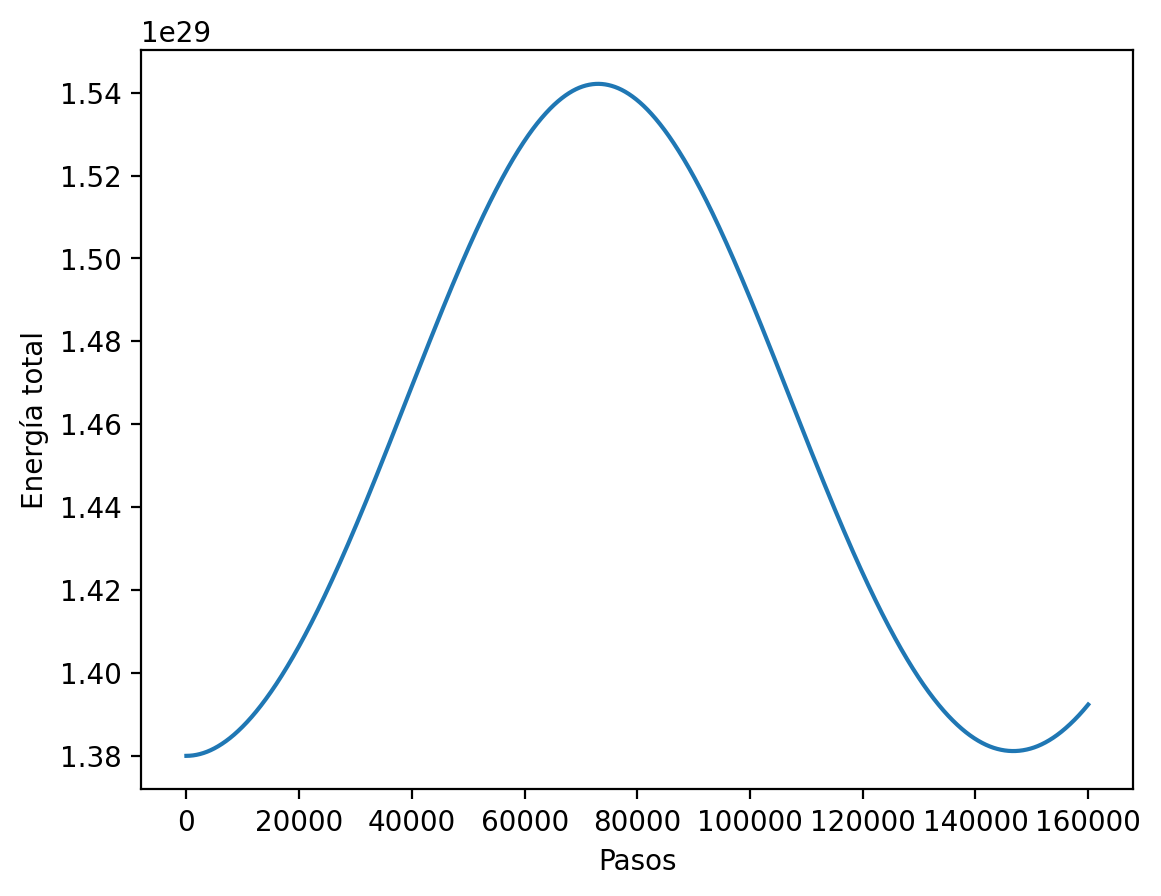

In [56]:
#Gráficas con las energías en función de los pasos
fig2 = plt.figure(dpi = 200)
plt.rcParams['axes.facecolor'] = 'white'

#Generamos un vector para el eje x
energy_xaxis = np.arange(0, index)

#plt.ylim(7.7e-11, 8e-11)

#for j in range(0, len(x_pos)):

plt.xlabel('Pasos')
plt.ylabel('Energía total')


sumarray = np.zeros(index)

for j in range (0, index):
    sum = 0.0
    for i in range (0, len(x_pos)):
        sum = k_energy[i][j] + p_energy[i][j]/G
    sumarray[j] = sum

sumarray = G*mass_sun**2/(c)*sumarray

print(sumarray)
plt.plot(energy_xaxis, sumarray)
plt.savefig('energia_total.pdf', bbox_inches='tight', dpi = 250)

In [53]:
#Comprobación del período orbital de los planetas

#Ya hemos almacenado los pasos en los que cada planeta pasa por su posición inicia en la lista 'period'.
#Ahora podemos calcular el periodo convirtiendo de los pasos de cada período a los días que cada paso representa

#Supongamos que tomamos el valor de la órbita de la Tierra como referencia, y dividimos el número de pasos que 
#ésta tarda entre la longitud del año terrestre; i.e., 6291/365.2 = 17.226

norm = period[3][0]/365.2

period_final = np.zeros(10)

#Pasamos los pasos a días terrestres (solares, no siderales)
for j in range (0, len(period_final)):
    period_final[j] = h*np.sqrt(c**3/(G*mass_sun))/(3600*24)*period[j][0]

for j in range (0, len(period_final)):
    if j != 3:
        print(f'Período de {planet[j]} = {period_final[j]} días.')
    else:
        print(f'Período de la {planet[j]} = {period_final[j]} días.')
    



Período de Sol = 0.0 días.
Período de Mercurio = 88.00757771581365 días.
Período de Venus = 224.1461160318213 días.
Período de la Tierra = 365.69066803843043 días.
Período de Marte = 683.7154089124175 días.
Período de Júpiter = 4364.164406981599 días.
Período de Saturno = 10998.68017647742 días.
Período de Urano = 30357.208298265108 días.
Período de Neptuno = 58177.42668779245 días.
Período de Plutón = 85402.28602120001 días.


[0.00000000e+00 2.37187390e-11 2.86994638e-09 ... 1.42010069e-02
 1.42053849e-02 1.42097622e-02] 160001
[0.00000000e+00 0.00000000e+00 4.03897310e-12 ... 8.54806752e-01
 8.54813832e-01 8.54820914e-01] 160001


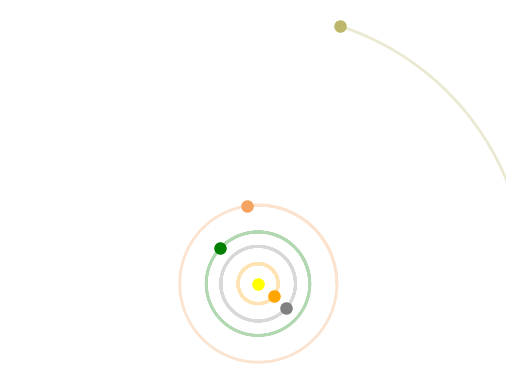

In [54]:
# Function to update the plot for each frame of the animation
import matplotlib.animation as animation

T = 1500
N = 10

print(xaxis[0], len(xaxis[0]))
print(yaxis[0], len(yaxis[0]))

def update_plot(frame):
    plt.cla()  # Clear current plot
    for i in range(0, len(x_pos)):
        plt.xlim(-0.25,0.25)
        plt.xlim(-0.25,0.25)
        plt.plot(xaxis[i][:frame+1], 
                 yaxis[i][:frame+1], 
                 alpha=0.3, linewidth=4, label = planet[i], color = color[i])  # Plot previous positions with shading
        plt.plot(xaxis[i, frame], yaxis[i, frame], 'o', markersize=8, label = planet[i], color = color[i])  # Plot current position
        plt.gca().set_aspect('equal', adjustable='datalim')
        plt.axis('off')  # Turn off axes
        

# Create a new figure and axis
fig, ax = plt.subplots()
 
# Create the animation
anim = animation.FuncAnimation(fig, update_plot, frames=T, interval=3)

# Save the animation as a GIF file
anim.save('gif_simulation_outer.gif', writer='pillow')

# Show the animation (optional)
#plt.show()

NameError: name 'animation' is not defined

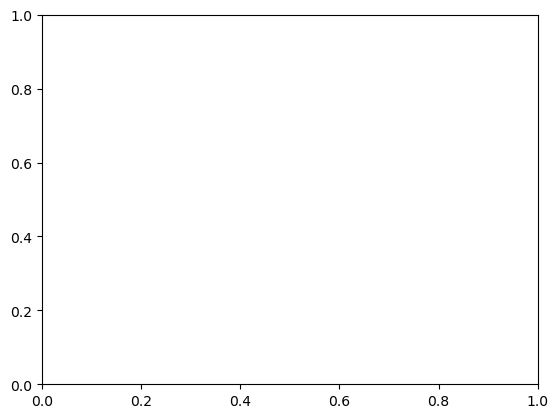

In [2]:
T = 100

def update_plot(frame):
    plt.cla()  # Clear current plot
    for i in range(0, len(x_pos)):
        plt.scatter(stars[0], stars[1], color = 'white', s = 0.03)
        plt.xlim(-20,20)
        plt.xlim(-20,20)
        plt.plot(xaxis[i][:frame+1], 
                 yaxis[i][:frame+1], 
                 alpha=0.3, linewidth=2, label = planet[i], color = color[i])  # Plot previous positions with shading
        plt.plot(xaxis[i, frame], yaxis[i, frame], 'o', markersize=8, label = planet[i], color = color[i])  # Plot current position
        plt.gca().set_aspect('equal', adjustable='datalim')
        plt.axis('off')  # Turn off axes
        

# Create a new figure and axis
fig, ax = plt.subplots()

plt.rcParams['axes.facecolor'] = 'black'
 
# Create the animation
anim = animation.FuncAnimation(fig, update_plot, frames=T, interval=0.2)

# Save the animation as a GIF file
anim.save('gif_simulation_outer_extra.gif', writer='pillow')

# Show the animation (optional)
#plt.show()